Here, we further process cleaned data to feed the model.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig_params={'legend.fontsize':18,
          'axes.labelsize': 18,
          'axes.titlesize':20,
          'xtick.labelsize':16,
          'ytick.labelsize':16,             
          'axes.facecolor':'#D9DDD1'}
plt.rcParams.update(fig_params)

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [2]:
df=pd.read_csv('./data/cleanData.csv')

In [3]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [14]:
X=df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month']]
y=df['price']
X_train_tmp, X_test_f, y_train_tmp, y_test_f=train_test_split(X,y,test_size=0.2,random_state=102)
X_train, X_cv, y_train, y_cv=train_test_split(X_train_tmp,y_train_tmp,test_size=0.25)

In [15]:
scaler=MinMaxScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_cv=scaler.transform(X_cv)

### Linear regression

In [18]:
linReg=LinearRegression()
linReg.fit(X_train,y_train)
y_train_pred=linReg.predict(X_train)

y_cv_pred=linReg.predict(X_cv)

In [32]:
print('mean sq error training data : ',mean_squared_error(y_train,y_train_pred))
print('mean sq error cross-val data : ',mean_squared_error(y_cv,y_cv_pred))
print()
print('mean abs error training data : ',mean_absolute_error(y_train,y_train_pred))
print('mean abs error cross-val data : ',mean_absolute_error(y_cv,y_cv_pred))


mean sq error training data :  26389749714.029247
mean abs error training data :  111532.23383811081


In [36]:
mean_absolute_error(y_train,y_train_pred)-mean_absolute_error(y_cv,y_cv_pred)

1501.8340045101359

### ANN

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam

In [34]:
X.shape

(21478, 19)

In [29]:
model=Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [37]:
model.fit(x=X_train,y=y_train,validation_data=(X_cv,y_cv),epochs=400,batch_size=128)

Epoch 1/400
101/101 [==============================] - 1s 6ms/step - loss: 365135036416.0000 - val_loss: 366381137920.0000
Epoch 2/400
101/101 [==============================] - 0s 3ms/step - loss: 363595464704.0000 - val_loss: 364502876160.0000
Epoch 3/400
101/101 [==============================] - 0s 3ms/step - loss: 361361571840.0000 - val_loss: 361904472064.0000
Epoch 4/400
101/101 [==============================] - 0s 3ms/step - loss: 358362284032.0000 - val_loss: 358502432768.0000
Epoch 5/400
101/101 [==============================] - 0s 4ms/step - loss: 354541961216.0000 - val_loss: 354256551936.0000
Epoch 6/400
101/101 [==============================] - 0s 4ms/step - loss: 349849518080.0000 - val_loss: 349135372288.0000
Epoch 7/400
101/101 [==============================] - 0s 3ms/step - loss: 344243109888.0000 - val_loss: 343032692736.0000
Epoch 8/400
101/101 [==============================] - 0s 4ms/step - loss: 337645600768.0000 - val_loss: 335954706432.0000
Epoch 9/400
101/

Epoch 68/400
101/101 [==============================] - 0s 3ms/step - loss: 56641622016.0000 - val_loss: 58479890432.0000
Epoch 69/400
101/101 [==============================] - 0s 4ms/step - loss: 56353054720.0000 - val_loss: 58182967296.0000
Epoch 70/400
101/101 [==============================] - 0s 3ms/step - loss: 56064569344.0000 - val_loss: 57882955776.0000
Epoch 71/400
101/101 [==============================] - 0s 2ms/step - loss: 55771152384.0000 - val_loss: 57578053632.0000
Epoch 72/400
101/101 [==============================] - 0s 3ms/step - loss: 55476981760.0000 - val_loss: 57270079488.0000
Epoch 73/400
101/101 [==============================] - 0s 4ms/step - loss: 55175897088.0000 - val_loss: 56960802816.0000
Epoch 74/400
101/101 [==============================] - 0s 3ms/step - loss: 54875181056.0000 - val_loss: 56648708096.0000
Epoch 75/400
101/101 [==============================] - 0s 4ms/step - loss: 54574522368.0000 - val_loss: 56334249984.0000
Epoch 76/400
101/101 [==

Epoch 135/400
101/101 [==============================] - 0s 3ms/step - loss: 37124567040.0000 - val_loss: 38396280832.0000
Epoch 136/400
101/101 [==============================] - 1s 5ms/step - loss: 36921335808.0000 - val_loss: 38191665152.0000
Epoch 137/400
101/101 [==============================] - 0s 3ms/step - loss: 36723077120.0000 - val_loss: 37983834112.0000
Epoch 138/400
101/101 [==============================] - 1s 5ms/step - loss: 36530745344.0000 - val_loss: 37789335552.0000
Epoch 139/400
101/101 [==============================] - 0s 4ms/step - loss: 36340248576.0000 - val_loss: 37598310400.0000
Epoch 140/400
101/101 [==============================] - 0s 4ms/step - loss: 36154208256.0000 - val_loss: 37404741632.0000
Epoch 141/400
101/101 [==============================] - 0s 2ms/step - loss: 35976253440.0000 - val_loss: 37221748736.0000
Epoch 142/400
101/101 [==============================] - 0s 2ms/step - loss: 35799838720.0000 - val_loss: 37041221632.0000
Epoch 143/400
10

101/101 [==============================] - 0s 4ms/step - loss: 30783313920.0000 - val_loss: 31854845952.0000
Epoch 202/400
101/101 [==============================] - 0s 4ms/step - loss: 30747670528.0000 - val_loss: 31815788544.0000
Epoch 203/400
101/101 [==============================] - 0s 2ms/step - loss: 30707699712.0000 - val_loss: 31777132544.0000
Epoch 204/400
101/101 [==============================] - 0s 3ms/step - loss: 30672805888.0000 - val_loss: 31740657664.0000
Epoch 205/400
101/101 [==============================] - 0s 4ms/step - loss: 30638387200.0000 - val_loss: 31711399936.0000
Epoch 206/400
101/101 [==============================] - 0s 4ms/step - loss: 30605355008.0000 - val_loss: 31665500160.0000
Epoch 207/400
101/101 [==============================] - 0s 4ms/step - loss: 30570541056.0000 - val_loss: 31624857600.0000
Epoch 208/400
101/101 [==============================] - 0s 4ms/step - loss: 30537699328.0000 - val_loss: 31589668864.0000
Epoch 209/400
101/101 [=======

101/101 [==============================] - 1s 5ms/step - loss: 29300930560.0000 - val_loss: 30215149568.0000
Epoch 268/400
101/101 [==============================] - 0s 5ms/step - loss: 29294411776.0000 - val_loss: 30198888448.0000
Epoch 269/400
101/101 [==============================] - 0s 4ms/step - loss: 29279500288.0000 - val_loss: 30181959680.0000
Epoch 270/400
101/101 [==============================] - 1s 5ms/step - loss: 29262422016.0000 - val_loss: 30166558720.0000
Epoch 271/400
101/101 [==============================] - 1s 5ms/step - loss: 29247692800.0000 - val_loss: 30149007360.0000
Epoch 272/400
101/101 [==============================] - 1s 5ms/step - loss: 29237274624.0000 - val_loss: 30136418304.0000
Epoch 273/400
101/101 [==============================] - 1s 9ms/step - loss: 29229869056.0000 - val_loss: 30133000192.0000
Epoch 274/400
101/101 [==============================] - 0s 5ms/step - loss: 29212192768.0000 - val_loss: 30107174912.0000
Epoch 275/400
101/101 [=======

101/101 [==============================] - 1s 7ms/step - loss: 28596809728.0000 - val_loss: 29387913216.0000
Epoch 334/400
101/101 [==============================] - 1s 5ms/step - loss: 28587134976.0000 - val_loss: 29378052096.0000
Epoch 335/400
101/101 [==============================] - 1s 7ms/step - loss: 28575399936.0000 - val_loss: 29367904256.0000
Epoch 336/400
101/101 [==============================] - 1s 5ms/step - loss: 28569520128.0000 - val_loss: 29356316672.0000
Epoch 337/400
101/101 [==============================] - 1s 5ms/step - loss: 28561543168.0000 - val_loss: 29349341184.0000
Epoch 338/400
101/101 [==============================] - 1s 7ms/step - loss: 28551481344.0000 - val_loss: 29345032192.0000
Epoch 339/400
101/101 [==============================] - 1s 6ms/step - loss: 28540067840.0000 - val_loss: 29321832448.0000
Epoch 340/400
101/101 [==============================] - 1s 8ms/step - loss: 28531120128.0000 - val_loss: 29314373632.0000
Epoch 341/400
101/101 [=======

101/101 [==============================] - 1s 7ms/step - loss: 27947202560.0000 - val_loss: 28648001536.0000
Epoch 400/400
101/101 [==============================] - 1s 5ms/step - loss: 27937624064.0000 - val_loss: 28632846336.0000


In [38]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

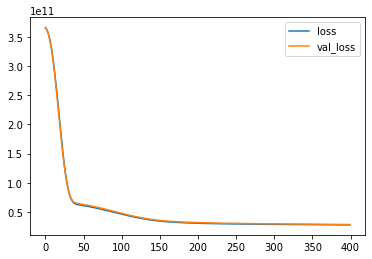

In [42]:
losses.plot()

In [43]:
y_train_pred_nn=model.predict(X_train)
y_cv_pred_nn=model.predict(X_cv)

In [44]:
print('mean sq error training data nn : ',mean_squared_error(y_train,y_train_pred_nn))
print('mean sq error cross-val data nn : ',mean_squared_error(y_cv,y_cv_pred_nn))
print()
print('mean abs error training data nn : ',mean_absolute_error(y_train,y_train_pred_nn))
print('mean abs error cross-val data nn : ',mean_absolute_error(y_cv,y_cv_pred_nn))

mean sq error training data nn :  27928646401.878326
mean sq error cross-val data nn :  28632846927.393536

mean abs error training data nn :  114482.14835398519
mean abs error cross-val data nn :  114198.36785399936


**Let's compare these results with Linear regression model**

In [45]:
print('mse(nn)/mse(LinReg) : ',mean_squared_error(y_train,y_train_pred_nn)/mean_squared_error(y_train,y_train_pred))

mse(nn)/mse(LinReg) :  1.058314182761308


Text(0, 0.5, 'Predicted')

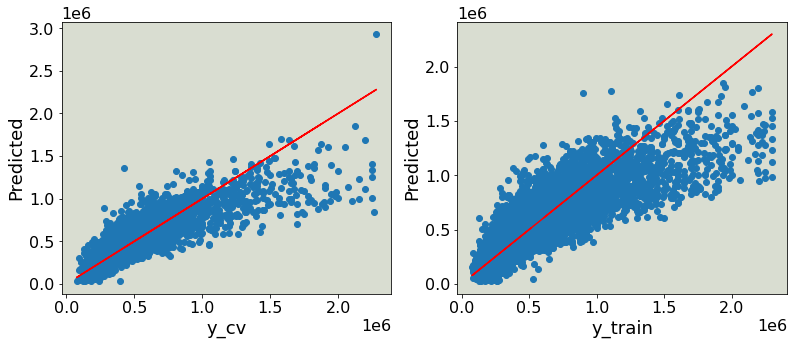

In [54]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(13,5))
ax[0].scatter(y_cv,y_cv_pred_nn)
ax[0].plot(y_cv,y_cv,'r')
ax[0].set_xlabel('y_cv')
ax[0].set_ylabel('Predicted')
ax[1].scatter(y_train,y_train_pred_nn)
ax[1].plot(y_train,y_train,'r')
ax[1].set_xlabel('y_train');ax[1].set_ylabel('Predicted')